In [1]:
# core imports

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# import training/testing dataset

training_df = pd.read_csv(Path("../Resources/training_dataset_original.csv"))
testing_df = pd.read_csv(Path("../Resources/testing_dataset.csv"))

# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
display(X_train.tail())

# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]
display(X_test.tail())

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
59006,-0.224841,-0.182815,-0.182817,-0.189411,-0.191518,-0.105244,-0.213641,-0.189216,-0.202266,-0.220081,-0.218942,-0.174220,-0.205580,-0.206912,-0.086730,-0.202266,-0.217191,-0.194969
59007,-0.149498,-0.153444,-0.136048,-0.198706,-0.078807,-0.131121,-0.161011,-0.177011,-0.171751,-0.191696,-0.215157,-0.208470,-0.178749,-0.166843,-0.165335,-0.171751,-0.200379,-0.158183
59008,-0.223526,-0.179687,-0.181686,-0.203005,-0.191518,-0.127842,-0.213297,-0.184402,-0.202271,-0.219337,-0.218802,-0.193295,-0.212906,-0.205220,-0.105513,-0.202271,-0.216480,-0.192328
59009,1.004145,1.004144,0.589128,0.659983,1.504063,0.315861,1.533036,0.084743,0.930268,0.630094,0.604774,0.629126,0.563857,1.107517,0.288940,0.930268,0.760133,0.937813
59010,-0.224761,-0.182817,-0.182834,-0.192112,-0.191518,-0.113492,-0.213650,-0.188879,-0.202271,-0.218346,-0.215930,-0.177898,-0.205592,-0.195994,-0.092337,-0.202271,-0.212037,-0.194449


,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
19666,-0.215226,-0.164916,-0.194334,-0.181122,-0.181608,-0.094862,-0.208887,-0.175621,-0.182696,-0.225049,-0.236255,-0.163658,-0.193834,-0.199539,-0.105437,-0.182696,-0.226363,-0.175619
19667,-0.212986,-0.165046,-0.194220,-0.184832,-0.185888,-0.103520,-0.210132,-0.175893,-0.182165,-0.224273,-0.229114,-0.168517,-0.191778,-0.200033,-0.406323,-0.182165,-0.223765,-0.174307
19668,-0.210084,-0.161478,-0.193038,-0.182268,-0.162754,-0.098553,-0.216656,-0.172556,-0.178827,-0.223939,-0.236561,-0.165623,-0.189595,-0.205375,-0.102255,-0.178827,-0.228833,-0.170958
19669,-0.198817,-0.084905,-0.122853,-0.142938,-0.144338,-0.087156,-0.208782,-0.158340,-0.112154,-0.171970,-0.178470,-0.140385,-0.158953,-0.172050,-0.057595,-0.112154,-0.185918,-0.101810
19670,-0.200724,-0.063058,-0.087832,-0.115193,-0.159361,-0.063184,-0.210541,-0.141537,-0.091192,-0.141662,-0.144627,-0.117248,-0.143870,-0.169791,-0.019760,-0.091192,-0.161145,-0.082975


# Model Comparision

### Logistic Regression

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.38      0.01      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.66      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671



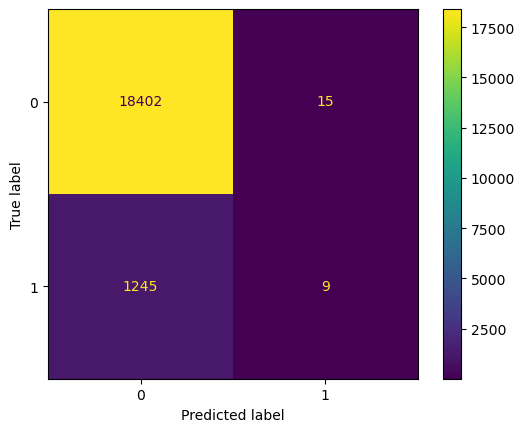

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

### Linear SVC

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.00      0.00      0.00      1254

    accuracy                           0.94     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.88      0.94      0.91     19671



c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


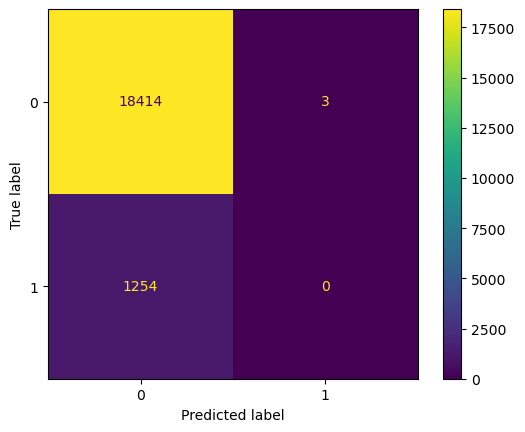

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC(tol=1e-5, max_iter=5000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

### MLP Classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.44      0.03      0.06      1254

    accuracy                           0.94     19671
   macro avg       0.69      0.51      0.51     19671
weighted avg       0.91      0.94      0.91     19671



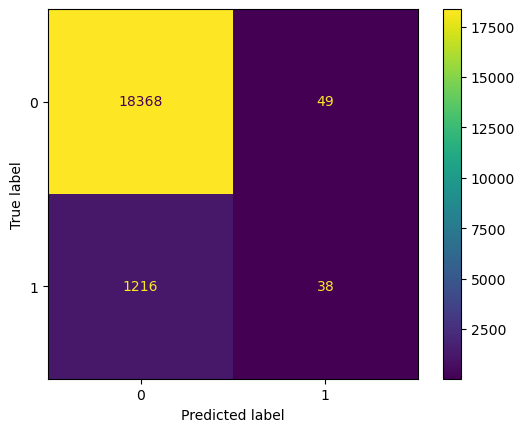

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

### SVC: kernel = 'rbf'

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.70      0.01      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.82      0.50      0.49     19671
weighted avg       0.92      0.94      0.91     19671



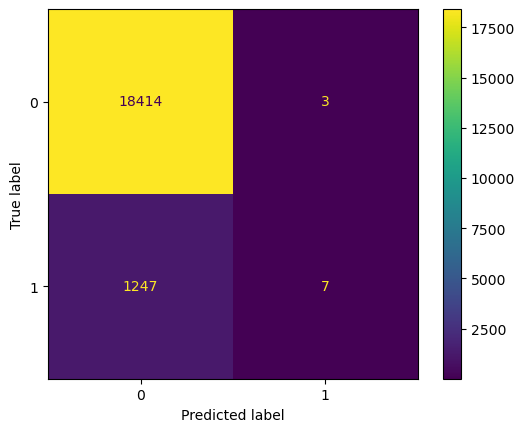

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

### Analysis

SVC kernel = 'rbf' has the highest precision score on class 1 (bankrupt).
Recall value for class 1 is really low overall.

# Resampling Comparision

Since SVC had the best performance, I will use it to compare the effect of resampling.

### Random Under Sampler

In [10]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

model = SVC(kernel='rbf')
model.fit(X_resample, y_resample)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.24      0.38     18417
           1       0.08      0.93      0.14      1254

    accuracy                           0.28     19671
   macro avg       0.53      0.59      0.26     19671
weighted avg       0.92      0.28      0.37     19671



### ClusterCentroids

In [11]:
from imblearn.under_sampling import ClusterCentroids

sampler = ClusterCentroids()
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

model = SVC(kernel='rbf')
model.fit(X_resample, y_resample)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.13      0.23     18417
           1       0.07      0.93      0.13      1254

    accuracy                           0.18     19671
   macro avg       0.52      0.53      0.18     19671
weighted avg       0.91      0.18      0.23     19671



### NearMiss

In [12]:
from imblearn.under_sampling import NearMiss

sampler = NearMiss(version=1, n_neighbors=2)
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

model = SVC(kernel='rbf')
model.fit(X_resample, y_resample)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.31      0.47     18417
           1       0.06      0.69      0.12      1254

    accuracy                           0.34     19671
   macro avg       0.50      0.50      0.29     19671
weighted avg       0.88      0.34      0.45     19671



### SMOTETomek

In [13]:
from imblearn.combine import SMOTETomek

sampler = SMOTETomek(sampling_strategy='all')
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

model = SVC(kernel='rbf')
model.fit(X_resample, y_resample)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.32      0.48     18417
           1       0.08      0.89      0.15      1254

    accuracy                           0.35     19671
   macro avg       0.53      0.60      0.31     19671
weighted avg       0.92      0.35      0.46     19671



# Imbalanced Learn Ensemble Methods

### EasyEnsembleClassifier

In [14]:
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     18417
           1       0.14      0.33      0.19      1254

    accuracy                           0.82     19671
   macro avg       0.54      0.59      0.55     19671
weighted avg       0.90      0.82      0.86     19671



### RUSBoostClassifier

In [15]:
from imblearn.ensemble import RUSBoostClassifier

model = RUSBoostClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     18417
           1       0.14      0.27      0.18      1254

    accuracy                           0.85     19671
   macro avg       0.54      0.58      0.55     19671
weighted avg       0.90      0.85      0.87     19671



### Balanced Random Forest Classifier

In [16]:
from imblearn.ensemble import BalancedBaggingClassifier

model = BalancedBaggingClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     18417
           1       0.13      0.32      0.19      1254

    accuracy                           0.82     19671
   macro avg       0.54      0.59      0.54     19671
weighted avg       0.90      0.82      0.85     19671



### Analysis

Resampling process will make class 1 precision worse, but increase class 1 recall very well.